# Lead Scoring Case Study 

In [1]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the NumPy and Pandas packages

import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder



# Loading and Cleaning Data

##   Import Data 

In [3]:
df = pd.read_csv("Leads.csv")
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


## Inspect the dataframe


In [4]:
#To get the idea of how the table looks like we can use .head() or .tail() command
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# The .info() code gives almost the entire information that needs to be inspected, so let's start from there
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#To get an idea of the numeric values, use .describe()
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# The .shape code gives the no. of rows and columns
df.shape

(9240, 37)

# Cleaning the dataframe

In [8]:
# Converting all the values to lower case
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [9]:
# Replacing 'Select' with NaN (Since it means no option is selected)
df = df.replace('api',np.nan)

In [10]:
# Checking if there are columns with one unique value since it won't affect our analysis
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         4
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [11]:
# Dropping unique valued columns
df1= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [12]:
# Checking the percentage of missing values
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                      38.74
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [13]:
# Removing all the columns that are no required and have 35% null values
df2 = df1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
df2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,NaN,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [14]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                       0.00
Lead Origin                                      38.74
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [15]:
df2['Specialization'] = df2['Specialization'].fillna('not provided') 
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('not provided')
df2['Country'] = df2['Country'].fillna('not provided')
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('not provided')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    5660 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [16]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                       0.00
Lead Origin                                      38.74
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [17]:
df2["Country"].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [18]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df2['Country'] = df2.apply(lambda x:slots(x['Country']), axis = 1)
df2['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [19]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                       0.00
Lead Origin                                      38.74
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [20]:
# Checking the percent of lose if the null values are removed
round(100*(sum(df2.isnull().sum(axis=1) > 1)/df2.shape[0]),2)

1.48

In [21]:
df3 = df2[df2.isnull().sum(axis=1) <1]

In [22]:
# Code for checking number of rows left in percent
round(100*(df3.shape[0])/(df.shape[0]),2)

59.48

In [23]:
# Rechecking the percentage of missing values
round(100*(df3.isnull().sum()/len(df3.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [24]:
# To familiarize all the categorical values
for column in df3:
    print(df3[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

001b0ad3-9096-4af8-8205-912f5c6dafd8    1
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa897134-688c-45b9-ba5c-33c952dc0199    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa6fc8ca-ae09-4c9e-bae0-0427f5f56a70    1
                                       ..
53feb7d7-e15f-4de0-bee8-f01fa538c6b7    1
53eb261a-c8a8-410b-9110-3025d9ac5d22    1
53dd16bd-8201-448d-8e20-97de1cf44a7f    1
53c4e210-3344-4737-813f-74ef9a747ab6    1
fff4f056-6574-4f97-b85a-ea4198a2915b    1
Name: Prospect ID, Length: 5496, dtype: int64
----------------------------------------------------------------------------------------
landing page submission    4885
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64
----------------------------------------------------------------------------------------
direct traffic       2433
google               1715
organic search        698
reference             443
welingak website      129
facebook               31
referral sites         27
clic

In [25]:
# Removing Id values since they are unique for everyone
df_final = df3.drop('Prospect ID',1)
df_final.shape

(5496, 21)

#  EDA

###  Univariate Analysis

#### Numerical Variables

In [26]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5496 entries, 2 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    5496 non-null   object 
 1   Lead Source                                    5496 non-null   object 
 2   Do Not Email                                   5496 non-null   object 
 3   Do Not Call                                    5496 non-null   object 
 4   Converted                                      5496 non-null   int64  
 5   TotalVisits                                    5496 non-null   float64
 6   Total Time Spent on Website                    5496 non-null   int64  
 7   Page Views Per Visit                           5496 non-null   float64
 8   Last Activity                                  5496 non-null   object 
 9   Country                                        5496 

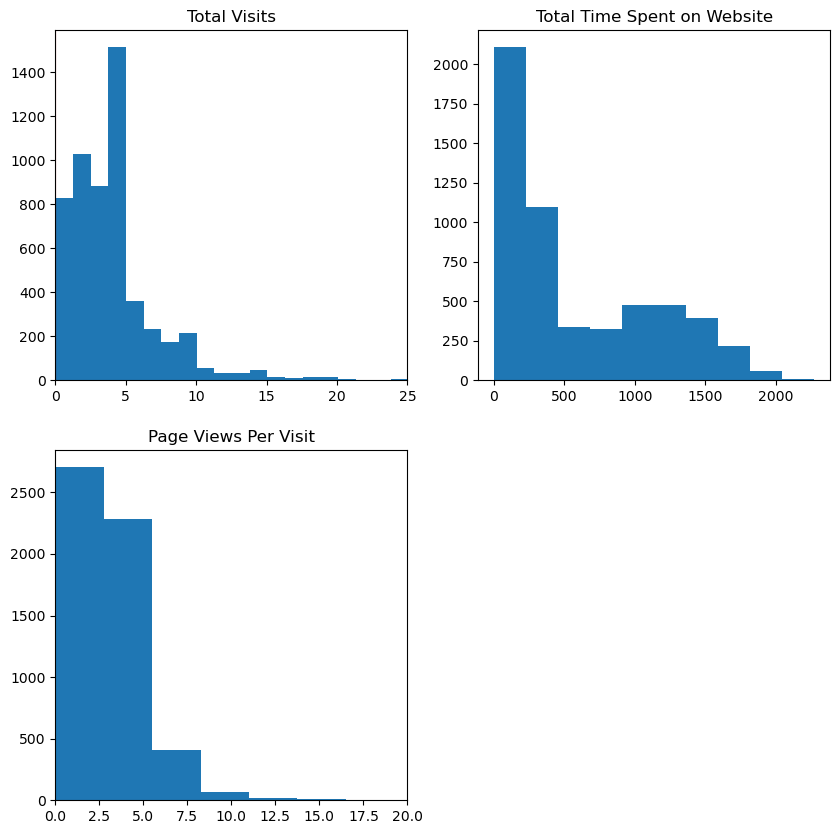

In [115]:
plt.figure(figsize = (10,10))


plt.subplot(2,2,1)
plt.hist(df_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(2,2,2)
plt.hist(df_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
plt.hist(df_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)

plt.show()

### Relating all the categorical variables to Converted

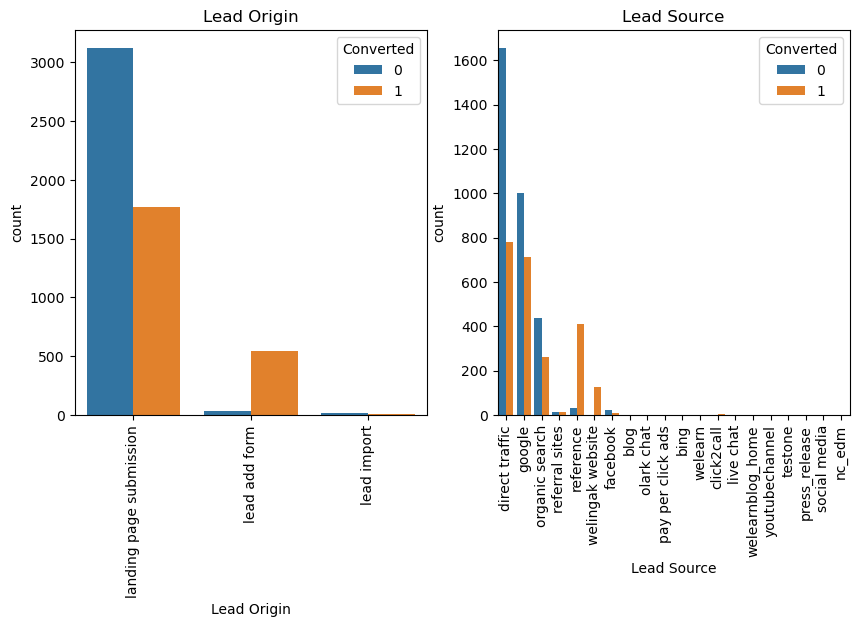

In [28]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

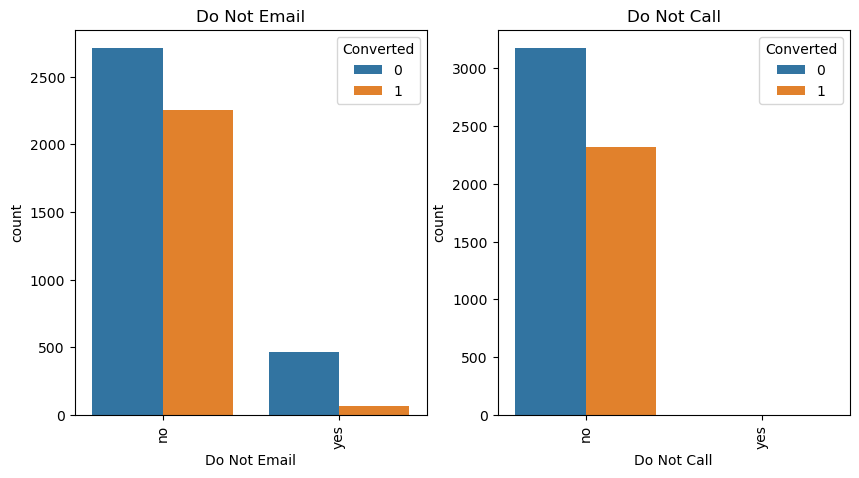

In [29]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

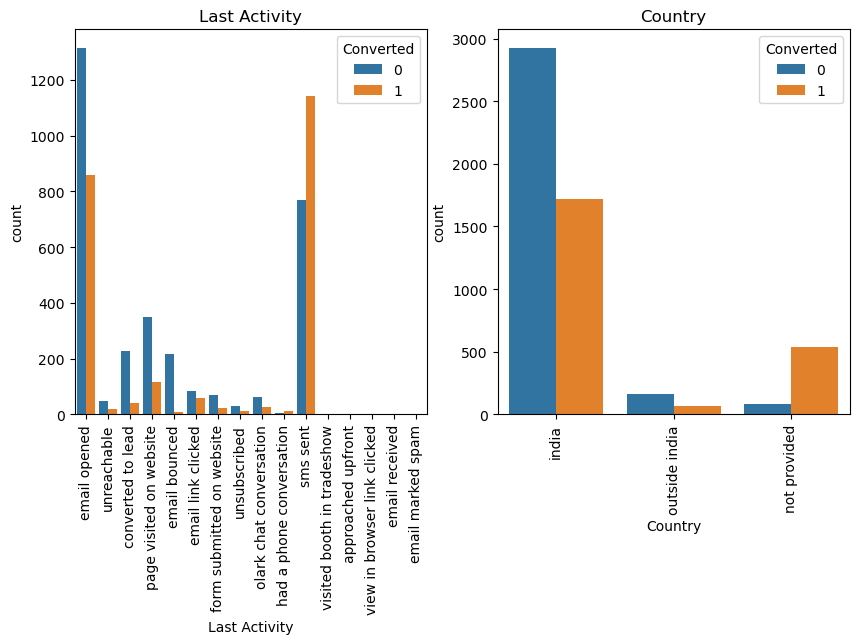

In [30]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

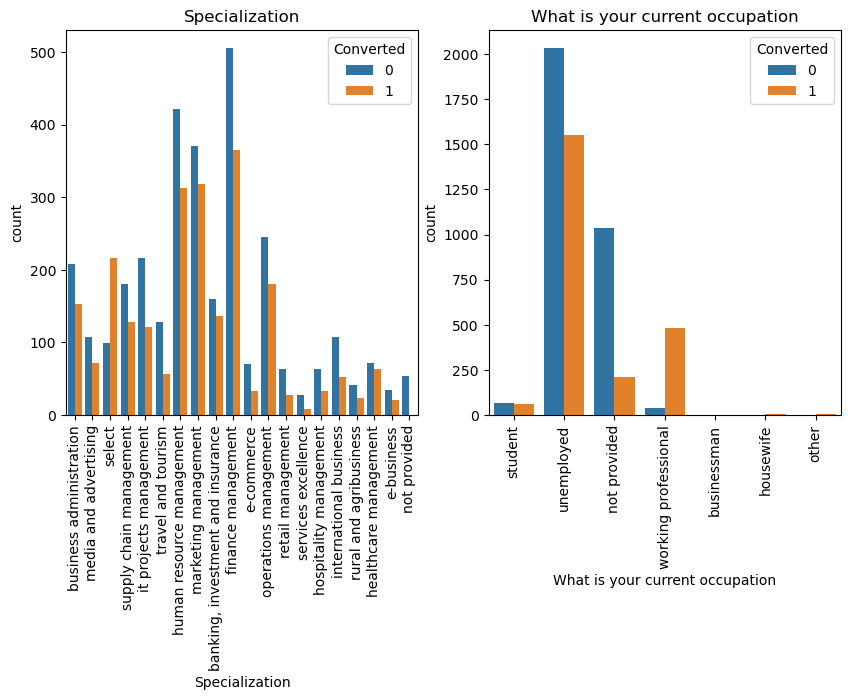

In [31]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

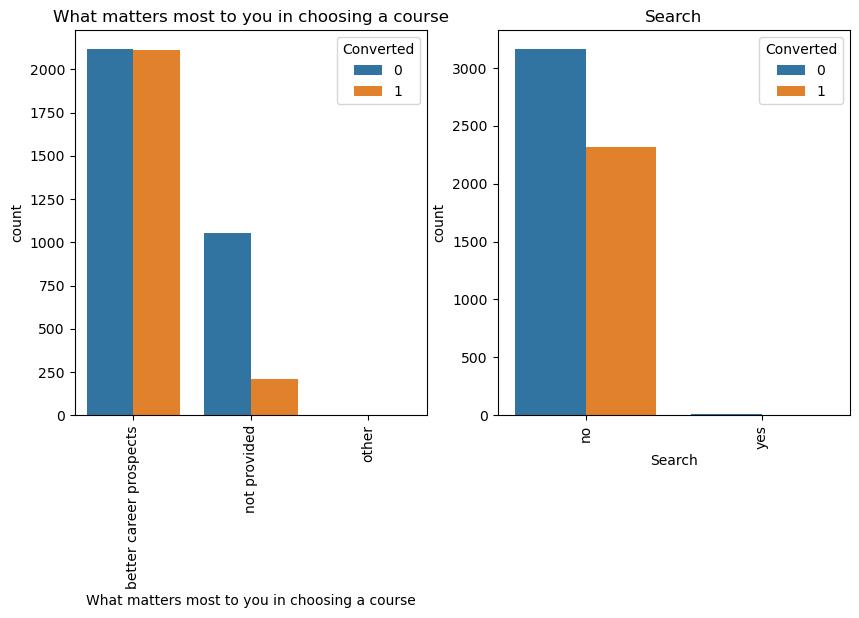

In [32]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

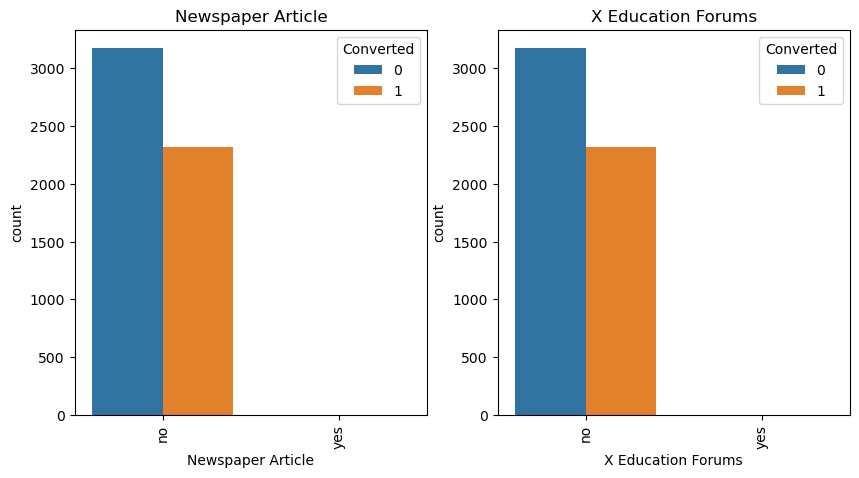

In [33]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

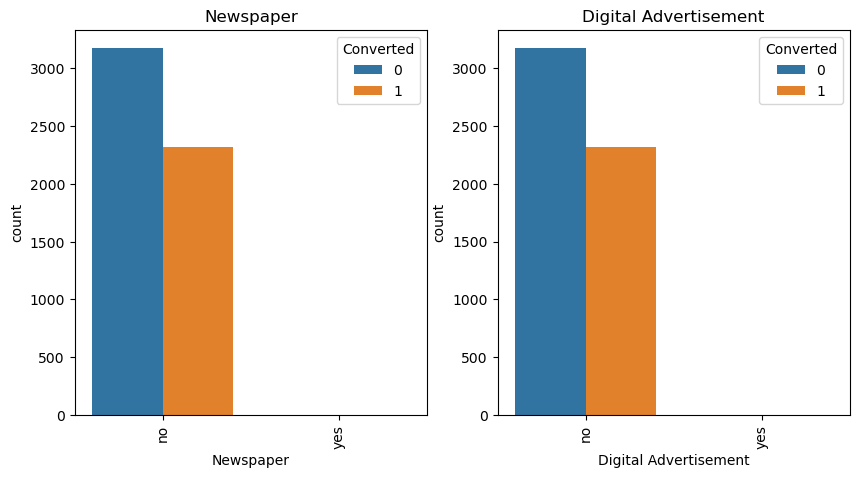

In [34]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

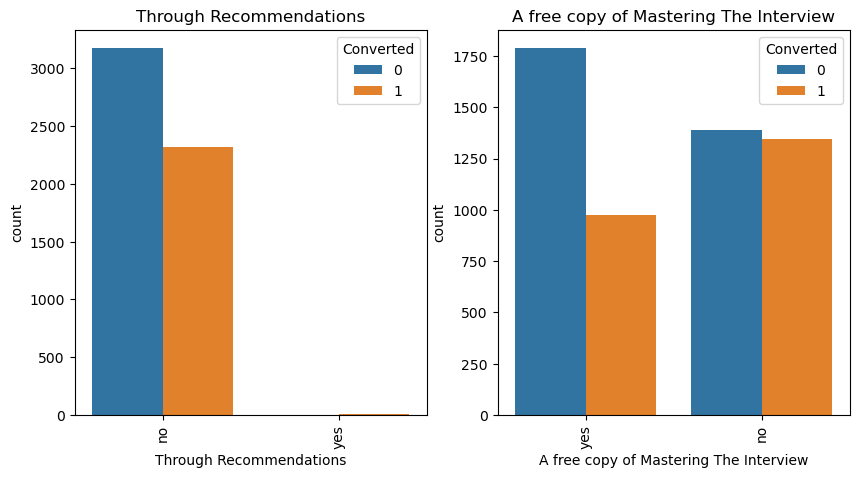

In [35]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

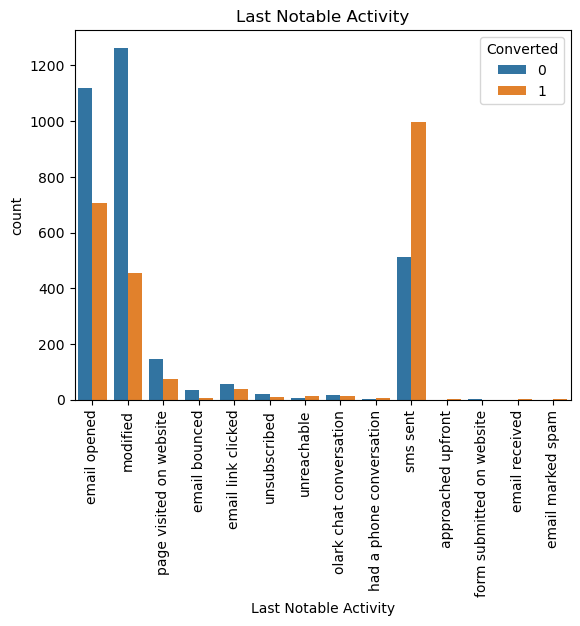

In [36]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

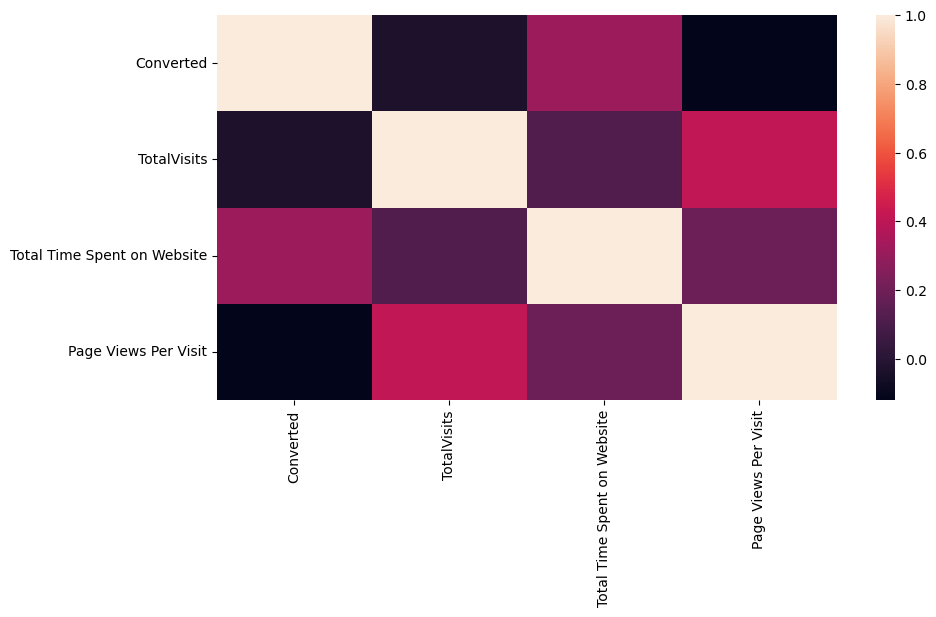

In [37]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(df_final.corr())
plt.show()

In [38]:
numeric = df_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,5496.000000,5496.000000,5496.000000
mean,4.266376,570.015648,2.985244
std,5.575359,549.071184,2.135753
min,0.000000,0.000000,0.000000
25%,2.000000,112.000000,2.000000
50%,4.000000,336.000000,3.000000
75%,5.000000,1042.500000,4.000000
90%,8.000000,1429.500000,5.000000
99%,18.000000,1849.050000,10.000000
max,251.000000,2272.000000,55.000000


# Dummy Variables

In [39]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5496 entries, 2 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    5496 non-null   object 
 1   Lead Source                                    5496 non-null   object 
 2   Do Not Email                                   5496 non-null   object 
 3   Do Not Call                                    5496 non-null   object 
 4   Converted                                      5496 non-null   int64  
 5   TotalVisits                                    5496 non-null   float64
 6   Total Time Spent on Website                    5496 non-null   int64  
 7   Page Views Per Visit                           5496 non-null   float64
 8   Last Activity                                  5496 non-null   object 
 9   Country                                        5496 

In [40]:
df_final.loc[:, df_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [41]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_final_dum = pd.concat([df_final, dummy], axis=1)
df_final_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,1,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,0,0,1,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,0,0,1,0,0,0,0,0
6,landing page submission,google,no,no,1,2.0,1640,2.00,email opened,india,...,0,0,0,0,1,0,0,0,0,0
8,landing page submission,direct traffic,no,no,0,2.0,71,2.00,email opened,india,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,outside india,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,0,1,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,0,1,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,0,0,0,0,0,0,0,1,0,0


In [42]:
df_final_dum = df_final_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_final_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed
2,1,2.0,1532,2.00,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,2.0,1428,1.00,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1,2.0,1640,2.00,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0,2.0,71,2.00,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9237,0,2.0,199,2.00,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9238,1,3.0,499,3.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Test-Train Split

In [43]:
X = df_final_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,...,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed
2,2.0,1532,2.0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2.0,1428,1.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,2.0,1640,2.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,2.0,71,2.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [44]:
# Putting the target variable in y
y = df_final_dum['Converted']
y.head()

2    1
3    0
4    1
6    1
8    0
Name: Converted, dtype: int64

In [45]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [46]:

# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,...,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed
7700,0.015936,0.155885,0.2500,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3521,0.019920,0.510332,0.3125,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
934,0.011952,0.549865,0.1875,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6247,0.019920,0.101078,0.3125,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
900,0.019920,0.525157,0.3125,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


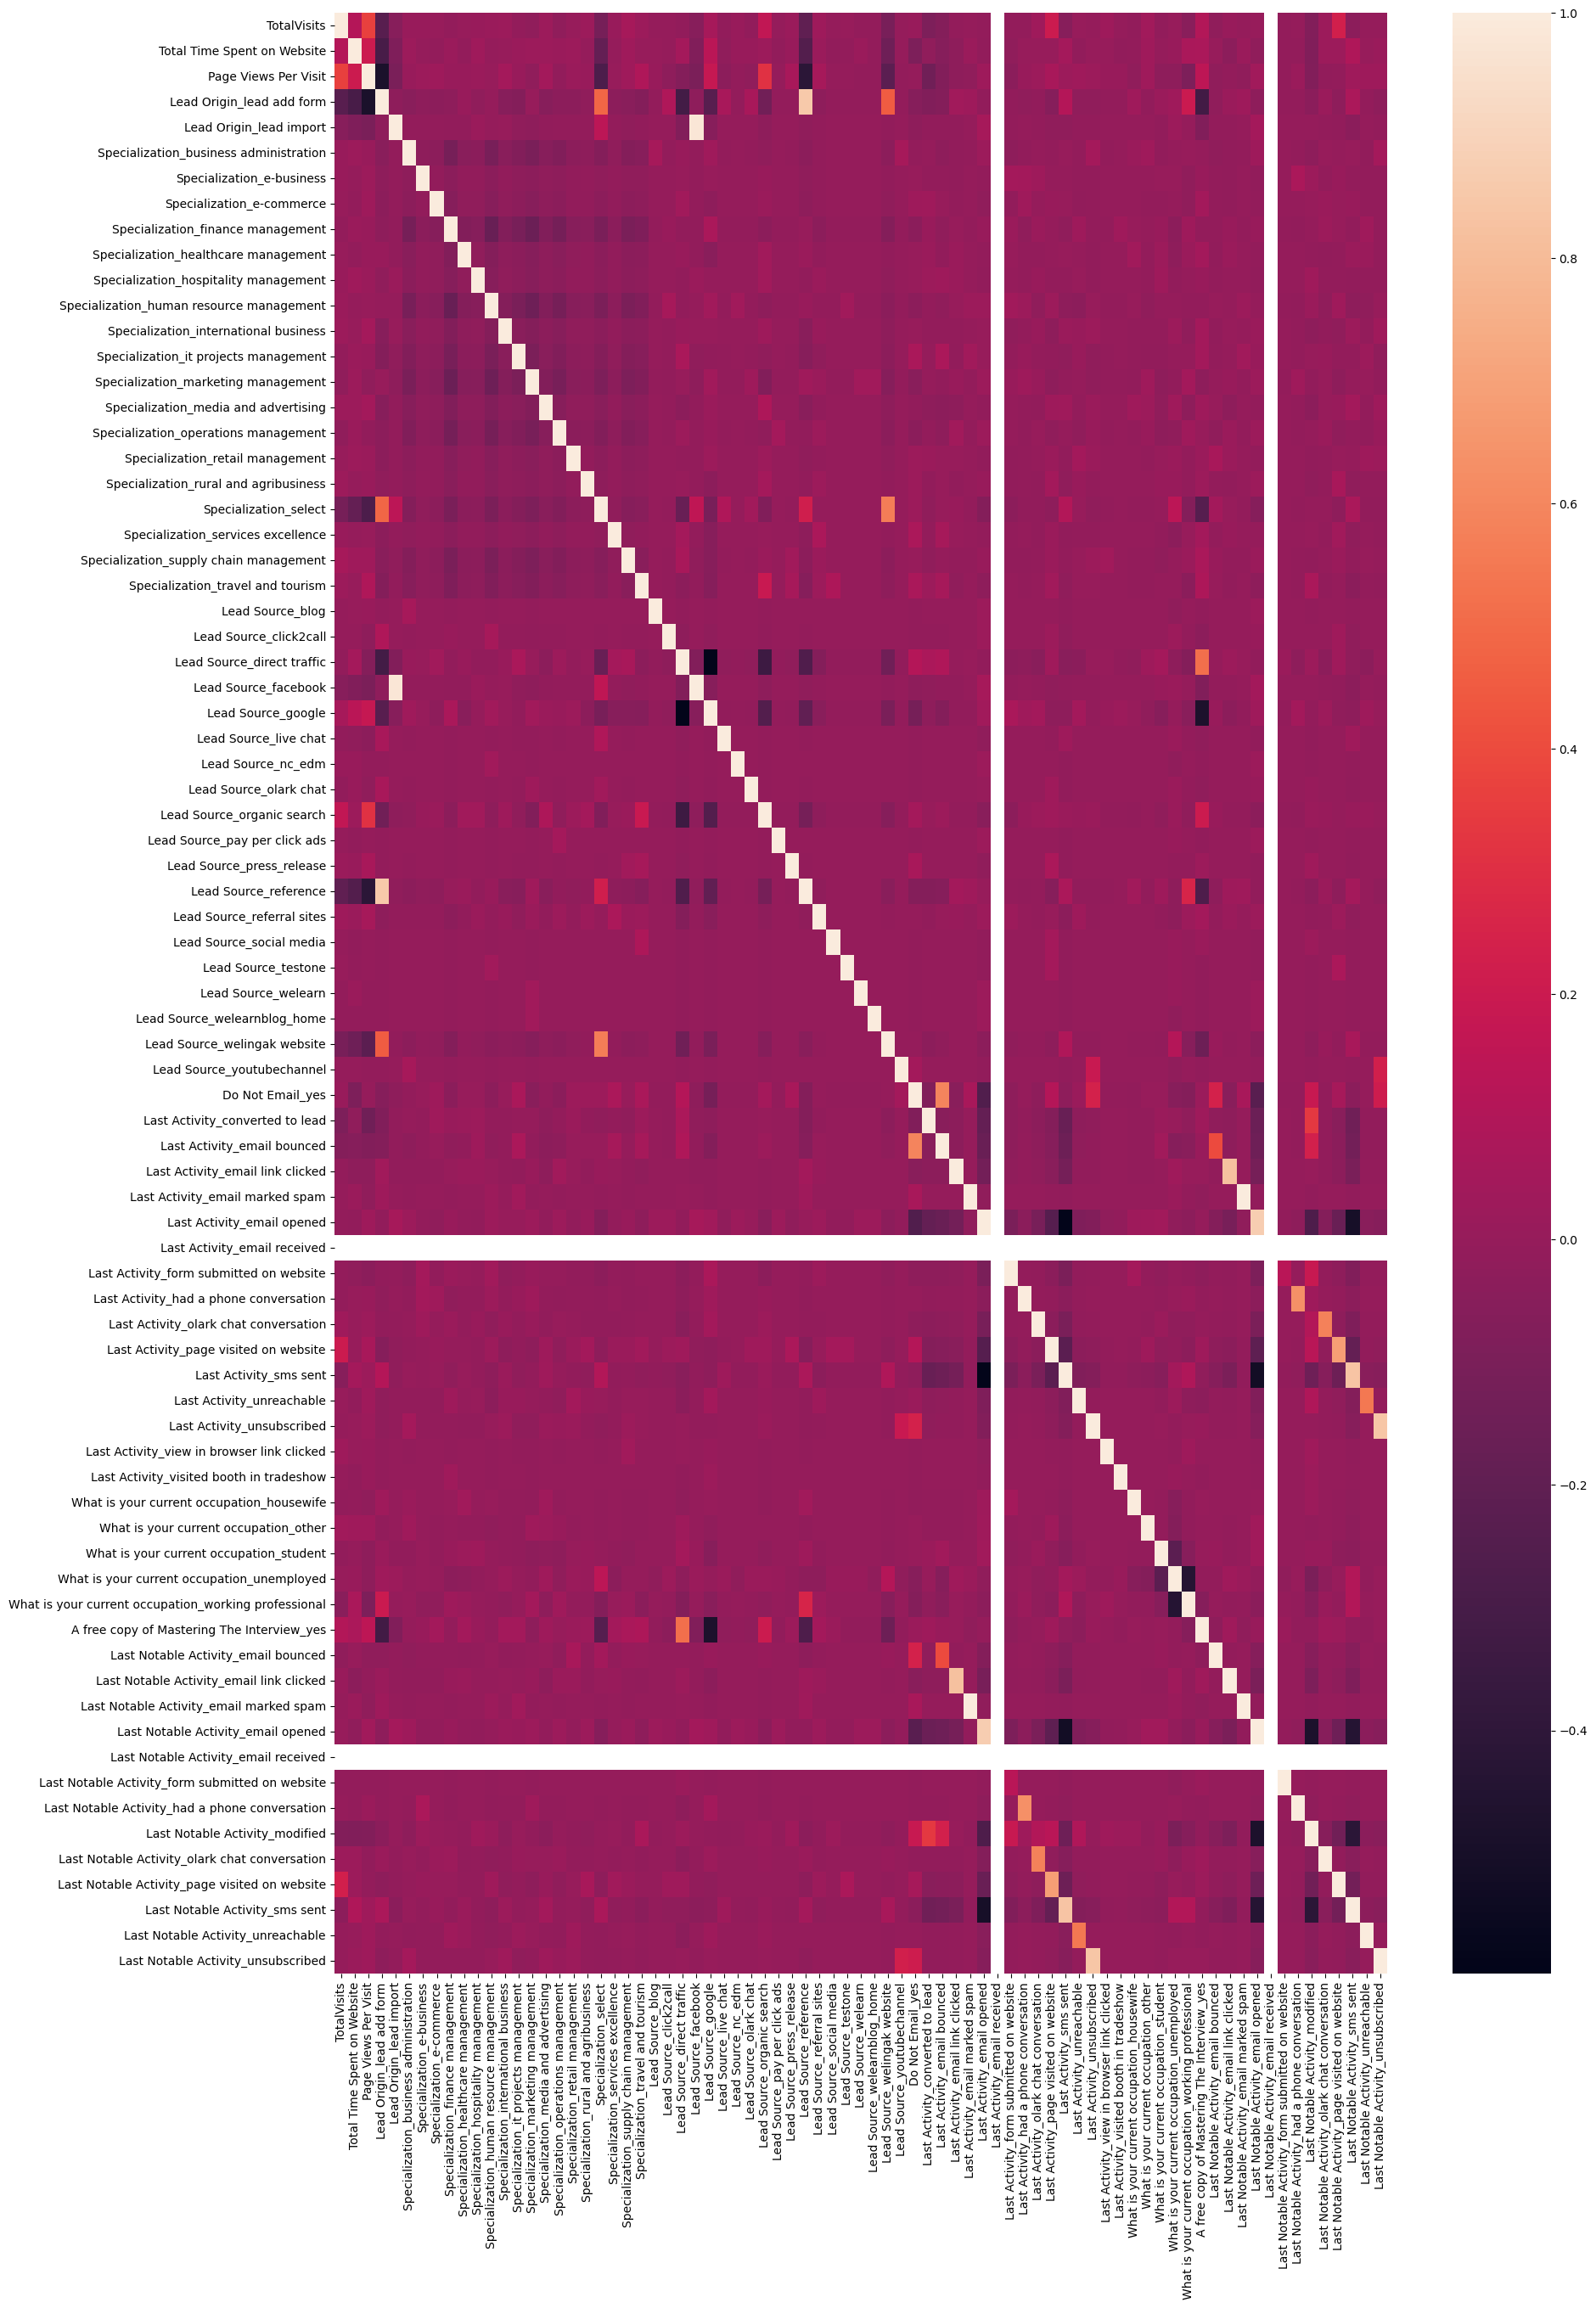

In [47]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

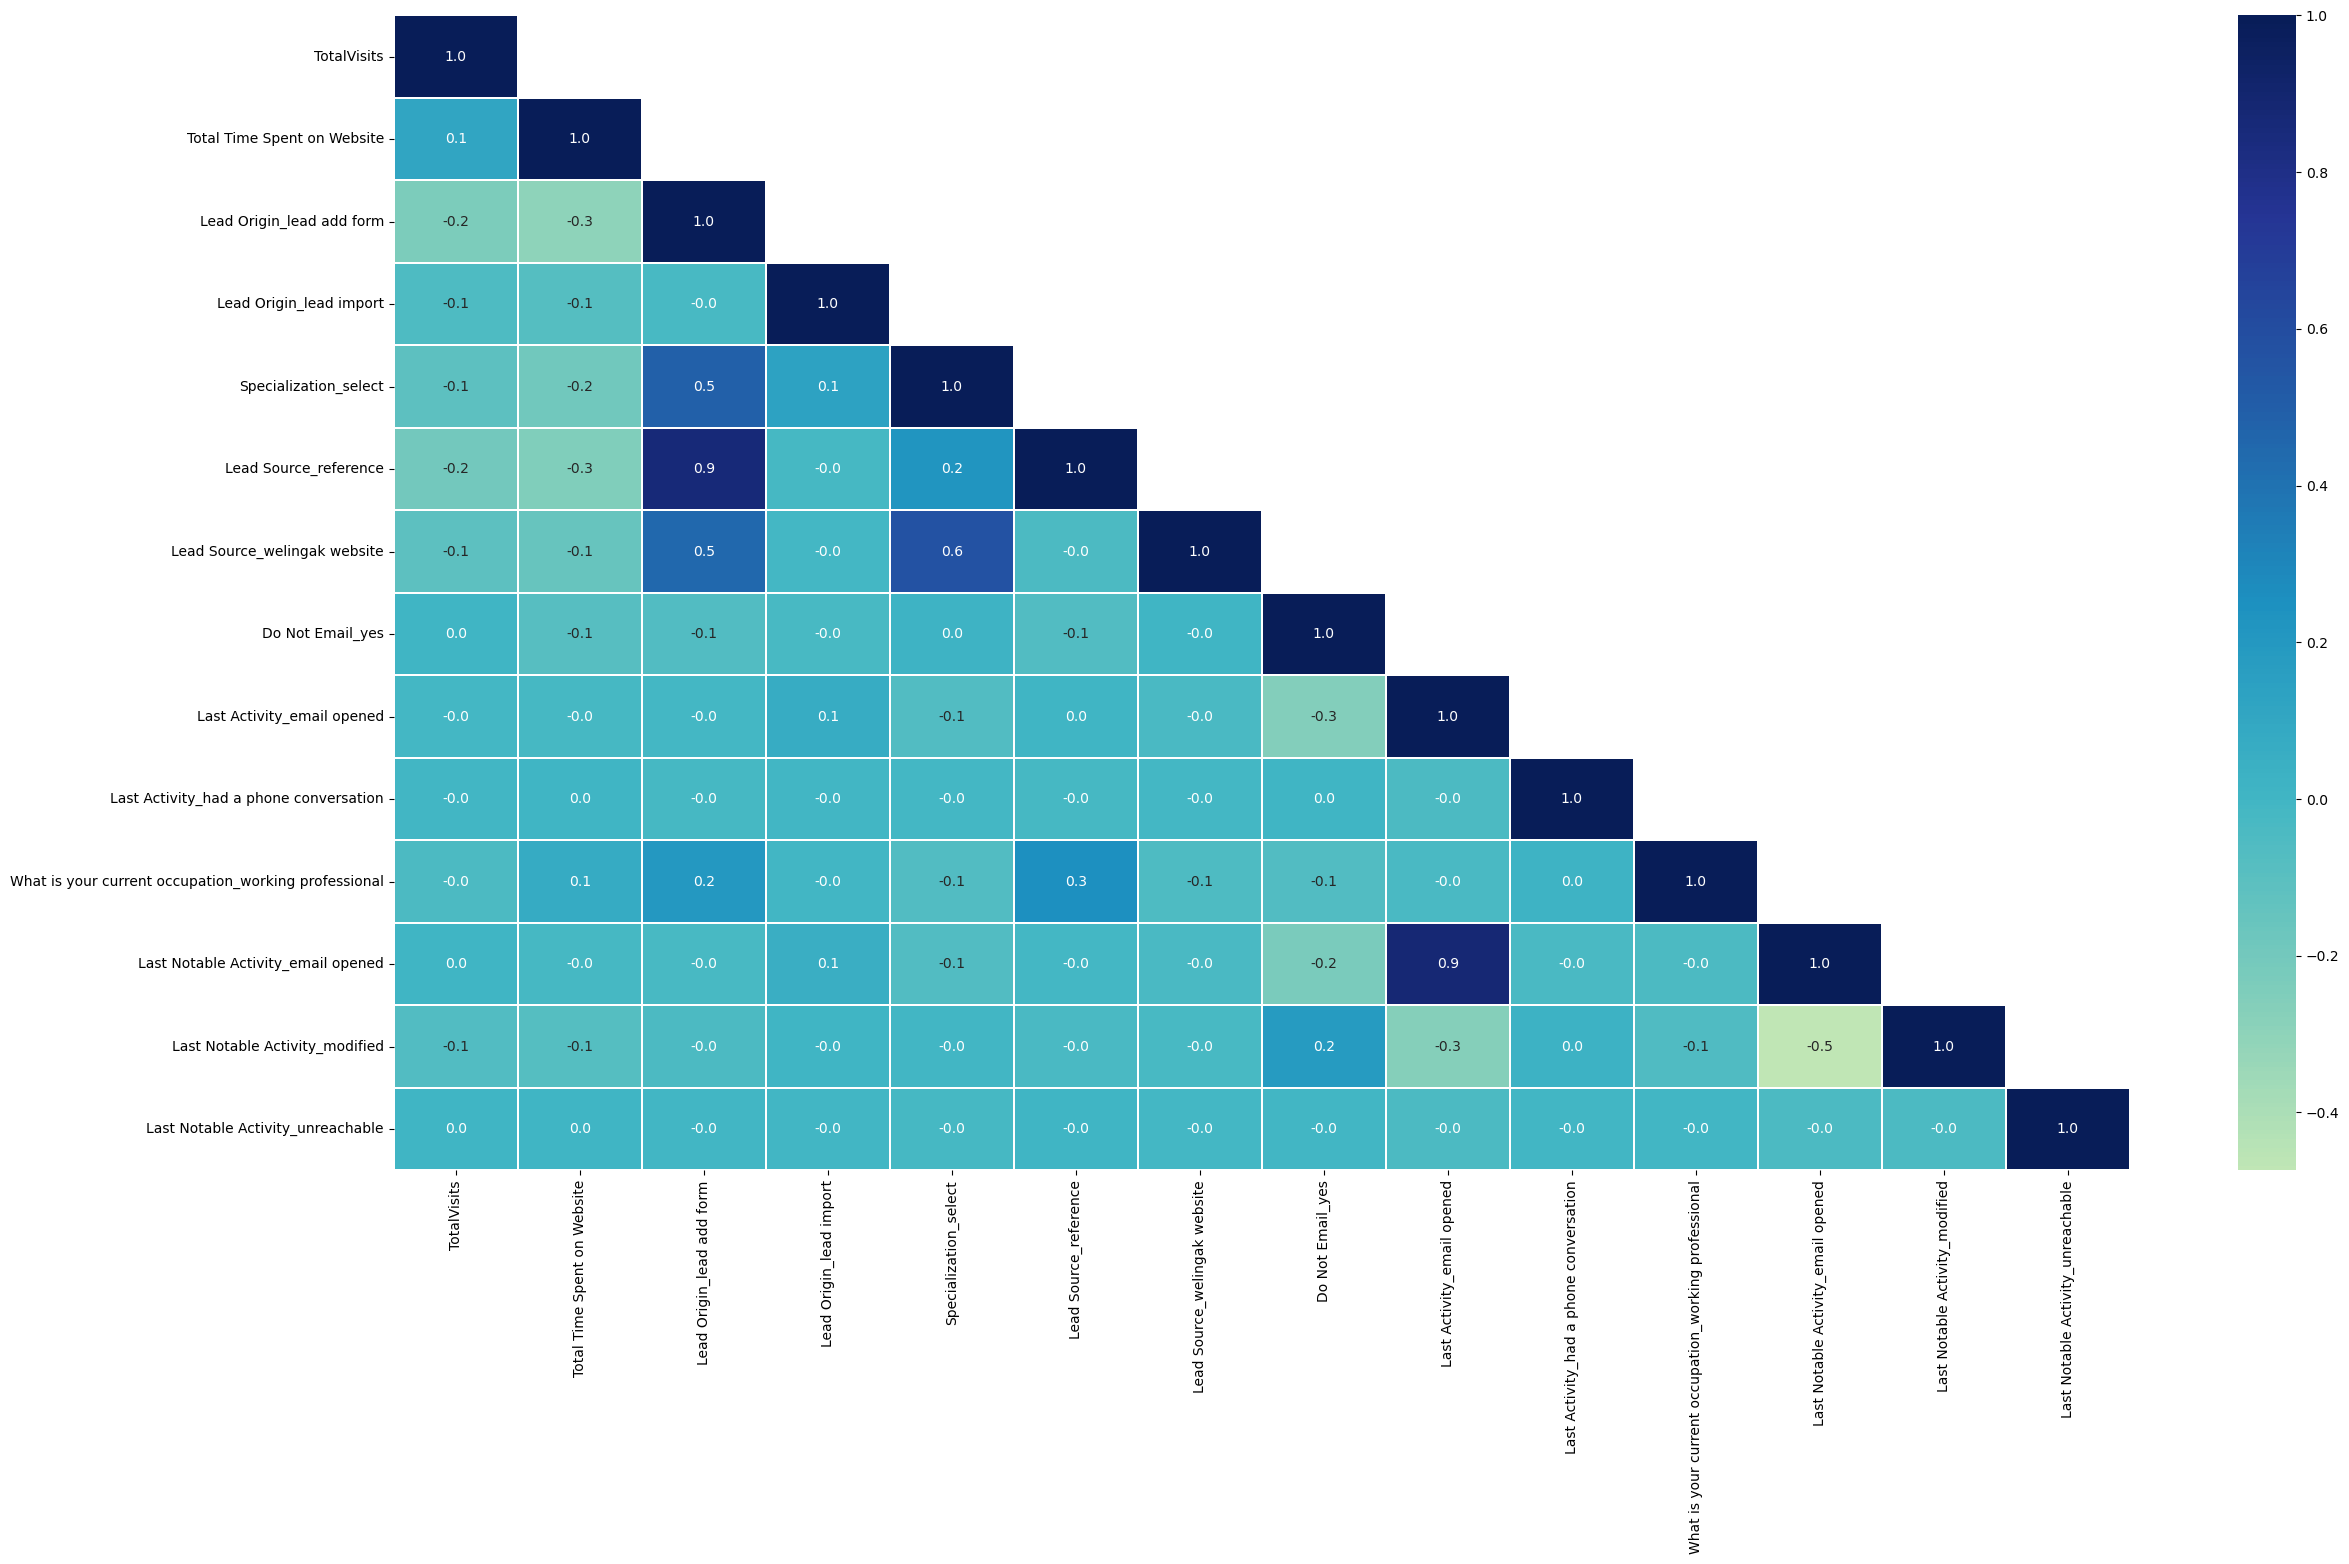

In [116]:
corr = X_train.corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask, k=1)] = True

plt.figure(figsize=(28,15))
sns.heatmap(corr, mask=mask, linewidth=0.3, annot=True, fmt='.1f', center=0, cmap='YlGnBu')
plt.show() 

# Model Building 

In [48]:
# Define your logistic regression model

logreg = LogisticRegression()

In [49]:
# Initialize RFE with the desired number of features (15 in this case)
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit RFE to the training data
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [50]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', True, 1),
 ('Specialization_business administration', False, 45),
 ('Specialization_e-business', False, 17),
 ('Specialization_e-commerce', False, 44),
 ('Specialization_finance management', False, 48),
 ('Specialization_healthcare management', False, 41),
 ('Specialization_hospitality management', False, 8),
 ('Specialization_human resource management', False, 57),
 ('Specialization_international business', False, 58),
 ('Specialization_it projects management', False, 47),
 ('Specialization_marketing management', False, 32),
 ('Specialization_media and advertising', False, 24),
 ('Specialization_operations management', False, 37),
 ('Specialization_retail management', False, 18),
 ('Specialization_rural and agribusiness', False, 46),
 ('Specialization_select', True, 1),
 ('Specialization_services excellence', 

In [51]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

<font color= green>___All the variables selected by RFE, next statistics part (p-values and the VIFs).___</font>

In [52]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [53]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3847
Model:                            GLM   Df Residuals:                     3831
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1613.2
Date:                Sat, 24 Feb 2024   Deviance:                       3226.5
Time:                        01:17:49   Pearson chi2:                 3.91e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4114
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3799      0.103    -13.380      0.000      -1.582      -1.178
TotalVisits                                              3.9661      2.078      1.909      0.056      -0.106       8.039
Total Time Spent on Website                              4.6107      0.195     23.644      0.000       4.229       4.993
Lead Origin_lead add form                                3.2710      0.860      3.802      0.000       1.585       4.957
Lead Origin_lead import                                  2.0874      0.521      4.007      0.000       1.066       3.108
Specialization_select                                   -1.4375      0.329     -4.371      0.000      -2.082      -0.793
Lead Source_reference                                    1.7879      0.885      2.020      0.043       0.053       3.522
Lead Source_welingak website                             4.3311      1.137      3.809      0.000       2.103       6.560
Do Not Email_yes                                        -1.9141      0.219     -8.740      0.000      -2.343      -1.485
Last Activity_email opened                               0.6846      0.197      3.471      0.001       0.298       1.071
Last Activity_had a phone conversation                   1.1444      0.818      1.400      0.162      -0.458       2.747
What is your current occupation_housewife               22.5908   1.85e+04      0.001      0.999   -3.63e+04    3.63e+04
What is your current occupation_working professional     2.8556      0.238     11.973      0.000       2.388       3.323
Last Notable Activity_email opened                      -1.6210      0.222     -7.312      0.000      -2.055      -1.186
Last Notable Activity_modified                          -1.4632      0.125    -11.671      0.000      -1.709      -1.217
Last Notable Activity_unreachable                        1.4431      0.786      1.837      0.066      -0.097       2.983
========================================================================================================================
"""

In [54]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_lead add form,46.71
5,Lead Source_reference,36.07
6,Lead Source_welingak website,11.59
8,Last Activity_email opened,8.24
12,Last Notable Activity_email opened,8.10
4,Specialization_select,1.84
1,Total Time Spent on Website,1.68
13,Last Notable Activity_modified,1.64
0,TotalVisits,1.42
11,What is your current occupation_working profes...,1.22


In [55]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3847
Model:                            GLM   Df Residuals:                     3831
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1613.2
Date:                Sat, 24 Feb 2024   Deviance:                       3226.5
Time:                        01:17:49   Pearson chi2:                 3.91e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4114
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3799      0.103    -13.380      0.000      -1.582      -1.178
TotalVisits                                              3.9661      2.078      1.909      0.056      -0.106       8.039
Total Time Spent on Website                              4.6107      0.195     23.644      0.000       4.229       4.993
Lead Origin_lead add form                                3.2710      0.860      3.802      0.000       1.585       4.957
Lead Origin_lead import                                  2.0874      0.521      4.007      0.000       1.066       3.108
Specialization_select                                   -1.4375      0.329     -4.371      0.000      -2.082      -0.793
Lead Source_reference                                    1.7879      0.885      2.020      0.043       0.053       3.522
Lead Source_welingak website                             4.3311      1.137      3.809      0.000       2.103       6.560
Do Not Email_yes                                        -1.9141      0.219     -8.740      0.000      -2.343      -1.485
Last Activity_email opened                               0.6846      0.197      3.471      0.001       0.298       1.071
Last Activity_had a phone conversation                   1.1444      0.818      1.400      0.162      -0.458       2.747
What is your current occupation_housewife               22.5908   1.85e+04      0.001      0.999   -3.63e+04    3.63e+04
What is your current occupation_working professional     2.8556      0.238     11.973      0.000       2.388       3.323
Last Notable Activity_email opened                      -1.6210      0.222     -7.312      0.000      -2.055      -1.186
Last Notable Activity_modified                          -1.4632      0.125    -11.671      0.000      -1.709      -1.217
Last Notable Activity_unreachable                        1.4431      0.786      1.837      0.066      -0.097       2.983
========================================================================================================================
"""

In [56]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_lead add form,46.71
5,Lead Source_reference,36.07
6,Lead Source_welingak website,11.59
8,Last Activity_email opened,8.24
12,Last Notable Activity_email opened,8.10
4,Specialization_select,1.84
1,Total Time Spent on Website,1.68
13,Last Notable Activity_modified,1.64
0,TotalVisits,1.42
11,What is your current occupation_working profes...,1.22


<font color= green>___The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation housewife'___</font>

In [57]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [58]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3847
Model:                            GLM   Df Residuals:                     3832
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1616.8
Date:                Sat, 24 Feb 2024   Deviance:                       3233.6
Time:                        01:17:49   Pearson chi2:                 3.91e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4103
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3784      0.103    -13.383      0.000      -1.580      -1.177
TotalVisits                                              3.9113      2.064      1.895      0.058      -0.134       7.956
Total Time Spent on Website                              4.6112      0.195     23.656      0.000       4.229       4.993
Lead Origin_lead add form                                3.2680      0.861      3.797      0.000       1.581       4.955
Lead Origin_lead import                                  2.0829      0.521      3.998      0.000       1.062       3.104
Specialization_select                                   -1.4446      0.329     -4.393      0.000      -2.089      -0.800
Lead Source_reference                                    1.7958      0.885      2.029      0.042       0.061       3.531
Lead Source_welingak website                             4.3360      1.137      3.813      0.000       2.107       6.565
Do Not Email_yes                                        -1.9162      0.219     -8.754      0.000      -2.345      -1.487
Last Activity_email opened                               0.6957      0.196      3.542      0.000       0.311       1.081
Last Activity_had a phone conversation                   1.1403      0.817      1.395      0.163      -0.462       2.742
What is your current occupation_working professional     2.8509      0.238     11.954      0.000       2.383       3.318
Last Notable Activity_email opened                      -1.6287      0.221     -7.373      0.000      -2.062      -1.196
Last Notable Activity_modified                          -1.4555      0.125    -11.629      0.000      -1.701      -1.210
Last Notable Activity_unreachable                        1.4428      0.786      1.836      0.066      -0.097       2.983
========================================================================================================================
"""

In [59]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_lead add form,46.71
5,Lead Source_reference,36.07
6,Lead Source_welingak website,11.59
8,Last Activity_email opened,8.23
11,Last Notable Activity_email opened,8.10
4,Specialization_select,1.84
1,Total Time Spent on Website,1.68
12,Last Notable Activity_modified,1.64
0,TotalVisits,1.42
10,What is your current occupation_working profes...,1.22


#  Creating Prediction

In [60]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7700    0.177949
3521    0.980230
934     0.964254
6247    0.014686
900     0.589354
4893    0.378052
1149    0.147267
3233    0.961088
1349    0.474500
2708    0.395481
dtype: float64

In [61]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.17794877, 0.98022983, 0.96425392, 0.01468615, 0.5893538 ,
       0.3780521 , 0.14726737, 0.96108841, 0.47449969, 0.39548079])

In [62]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.177949
1,1,0.980230
2,1,0.964254
3,0,0.014686
4,1,0.589354


In [63]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.177949,0
1,1,0.980230,1
2,1,0.964254,1
3,0,0.014686,0
4,1,0.589354,1


# Model Evaluation

In [64]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1894,  284],
       [ 427, 1242]], dtype=int64)

In [65]:
# Predicted     not_churn    churn
# Actual
# not_churn        3403       492
# churn             729      1727

In [66]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.815180660254744

In [67]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [68]:
# Calculating the sensitivity
TP/(TP+FN)

0.74415817855003

In [69]:
# Calculating the specificity
TN/(TN+FP)

0.869605142332415

## Optimise Cut off (ROC Curve)

In [70]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [71]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

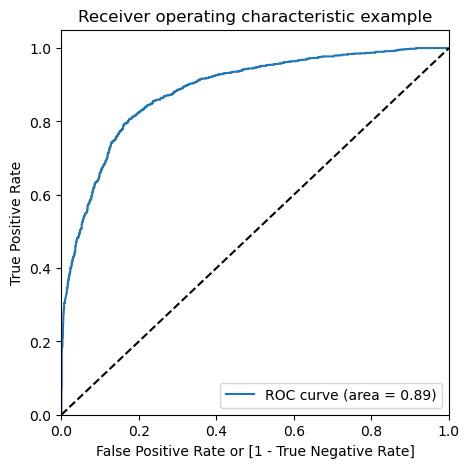

In [72]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [73]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.177949,0,1,1,0,0,0,0,0,0,0,0
1,1,0.980230,1,1,1,1,1,1,1,1,1,1,1
2,1,0.964254,1,1,1,1,1,1,1,1,1,1,1
3,0,0.014686,0,1,0,0,0,0,0,0,0,0,0
4,1,0.589354,1,1,1,1,1,1,1,0,0,0,0


In [74]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.433845,1.000000,0.000000
0.1,0.1,0.581232,0.982025,0.274105
0.2,0.2,0.739537,0.926902,0.595960
0.3,0.3,0.793086,0.864590,0.738292
0.4,0.4,0.814921,0.806471,0.821396
0.5,0.5,0.815181,0.744158,0.869605
0.6,0.6,0.795945,0.659676,0.900367
0.7,0.7,0.769171,0.553026,0.934803
0.8,0.8,0.740317,0.448173,0.964187
0.9,0.9,0.707044,0.344518,0.984848


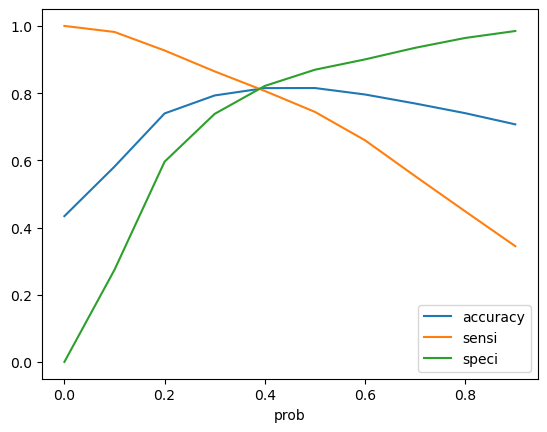

In [75]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [76]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.177949,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.980230,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.964254,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.014686,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.589354,1,1,1,1,1,1,1,0,0,0,0,1


In [77]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.807382375877307

In [78]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1706,  472],
       [ 269, 1400]], dtype=int64)

In [79]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [80]:
# Calculating the sensitivity
TP/(TP+FN)

0.8388256440982624

In [81]:
# Calculating the specificity
TN/(TN+FP)

0.783287419651056

##  Prediction on Test set

In [82]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [83]:
# Substituting all the columns in the final train model
col = X_train.columns

In [84]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Origin_lead import,Specialization_select,Lead Source_reference,Lead Source_welingak website,Do Not Email_yes,Last Activity_email opened,Last Activity_had a phone conversation,What is your current occupation_working professional,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_unreachable
5279,1.0,0.007968,0.087601,0,0,1,0,0,1,0,0,0,0,1,0
7398,1.0,0.059761,0.034591,0,0,0,0,0,1,0,0,0,0,0,0
8404,1.0,0.007968,0.114106,0,0,0,0,0,0,1,0,1,1,0,0
4960,1.0,0.023904,0.246181,0,0,0,0,0,0,0,0,0,0,0,0
6352,1.0,0.015936,0.535939,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8151,1.0,0.007968,0.010782,0,0,0,0,0,0,0,0,0,0,0,0
2640,1.0,0.027888,0.116801,0,0,0,0,0,0,0,0,0,0,1,0
7325,1.0,0.027888,0.019317,0,0,0,0,0,0,0,0,0,0,0,0
8942,1.0,0.007968,0.331986,0,0,0,0,0,0,0,0,1,0,1,0


In [85]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.003143
1,0,0.052089
2,1,0.749646
3,1,0.462641
4,0,0.098288


In [86]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.003143,0
1,0,0.052089,0
2,1,0.749646,1
3,1,0.462641,1
4,0,0.098288,0
...,...,...,...
1644,0,0.214581,0
1645,0,0.100994,0
1646,0,0.235006,0
1647,1,0.829058,1


In [87]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8047301394784718

In [88]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[787, 211],
       [111, 540]], dtype=int64)

In [89]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [90]:
# Calculating the sensitivity
TP/(TP+FN)

0.8294930875576036

In [91]:
# Calculating the specificity
TN/(TN+FP)

0.7885771543086172

## Precision-Recall

In [92]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1894,  284],
       [ 427, 1242]], dtype=int64)

In [93]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8138925294888598

In [94]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.74415817855003

### Precision and recall tradeoff

In [95]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       1
 3       0
 4       1
        ..
 3842    0
 3843    0
 3844    1
 3845    1
 3846    0
 Name: Converted, Length: 3847, dtype: int64,
 0       0
 1       1
 2       1
 3       0
 4       1
        ..
 3842    0
 3843    0
 3844    1
 3845    1
 3846    0
 Name: Predicted, Length: 3847, dtype: int64)

In [96]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

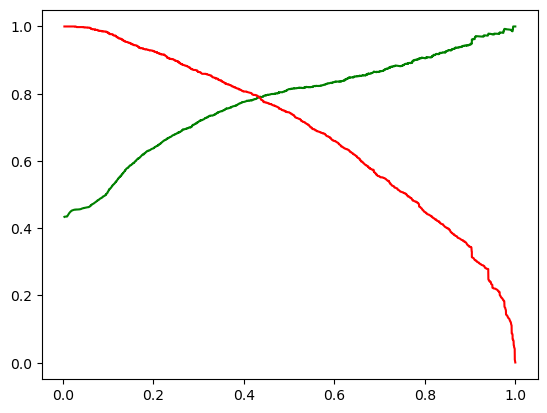

In [97]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [98]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.177949,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.980230,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.964254,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.014686,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.589354,1,1,1,1,1,1,1,0,0,0,0,1


In [99]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8159604886924876

In [100]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1797,  381],
       [ 327, 1342]], dtype=int64)

In [101]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [102]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7788740568775392

In [103]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8040742959856201

## Prediction on Test set

In [104]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.003143
1,0,0.052089
2,1,0.749646
3,1,0.462641
4,0,0.098288


In [105]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.003143,0
1,0,0.052089,0
2,1,0.749646,1
3,1,0.462641,1
4,0,0.098288,0
...,...,...,...
1644,0,0.214581,0
1645,0,0.100994,0
1646,0,0.235006,0
1647,1,0.829058,1


In [106]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8223165554881746

In [107]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[834, 164],
       [129, 522]], dtype=int64)

In [108]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [109]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.760932944606414

In [110]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8018433179723502